# Enhance your brand using YouTube
You're a data scientist at a global marketing agency that helps some of the world's largest companies enhance their online presence. 

## Objective
Your project is to identify the most effective YouTube videos to promote your clients’ brands; dive deep and discover who really connects with audiences through innovative content analysis.

## Outline of steps taken
1) Import libraries, data, and helper functions
2) Data Preprocessing and Cleaning: fix outliers, feature engineering, remap categories, and throw out information where necessary
4) Exploratory Data Analysis: understand the underlying relationships of both Video Stats and Comments
5) Model Building
6) Strategic recommendations for E-Learning Collaboration

## Let me briefly explain the purpose of each step

### Import Libaries, Data, and Helper Functions
- We need to perform a significant number of steps and these are the instruments of our analysis
    
### Data Processing and Cleaning
- "Video Stats" dataset is riddled with errors and null values; it also contains a large segment of non-English titles only add noise to our analysis and model building. I throw out all entries that are not English language
- Secondly, I incorporate a new feature, "engagement rate," to measure the video's popularity. I settle on a definition of engagement rate as equal to the ratio of the sum of likes and 1.5 times the comments over the total number of views.
    
### Exploratory Data Analysis
- For **Video Stats**, we must answer the following questions at minimum:
  - How does a video's engagement rate vary across industry?
  - How are videos distributed across time?
  - Which industries have the highest view count, likes, and comments?
  - Are there specific keywords that generate higher engagement?
  - How do engagement metrics vary over time? Are there noticeable trends or patterns?
  - What are the characteristics of the top-performing videos in each industry?
- For **Comments**, we must answer the following questions at minimum:
  - What is the overall comment distribution?
  - How does comment sentiment vary by Industry?
  - Is there a relationship between comment sentiment and engagement rate?

For both datasets, it was crucial to keep in mind that the EDA was in service of the model building. I did not assume that the datasets were representative of YouTube video population. If a video observation failed to meet the model building requirements, it was filtered out prior to visualization.

### Model Building
- We will pare down our datasets to their core features
  - Using the following features: 'Industry', 'Title_Clean', 'Avg Views', 'Avg Comments', and 'Avg Likes'
  - Our target variable is 'Engagement Rate'
- So, our model takes the above mentioned features and predicts what the video's average engagement rate should be.
- The data will be churned into a pipeline that is fed to an XGBoost regression estimator

### Strategic recommendations for E-Learning Collaboration
- Using our newly built XGBoost model, we will feed the dataset back into the model and predict the engagement rate for each video
- We will filter the existing dataset based on temporal and keywords, then return the videos with the highest model-predicted engagement rate

## Let me define some important concepts and assumptions

### How should we measure audience connection?
The dataset supplies us with three qualitative features: views, likes, and comments. A view a precondition for a like or a comment: someone who has viewed the video may not necessarily like or comment on it. A video that deeply connects with a user is more likely to have comments and likes. Because of the user effort it takes to write a comment is greater than the effort to leave a comment, I have increased the weight of a comment as a means of signaling higher engagement. I therefore define a video's engagement rate using the following formula:
$$
\text{Engagement Rate} = \frac{\text{Likes} + 1.5 * \text{Comments}}{\text{Views}}
$$
I will use this metric later to build my model. A high engagement rate indicates strong viewer interaction and interest.

### How valid is our dataset for the purposes of model building?
- I am assuming that the target of our model building exercise is an English speaking audience and therefore have excluded all non-English entries from consideration during exploratory data analysis and model building. In fact there is a signficant number of observations in both the Video Stats and Comments datasets that are non-English.
- In addition, we will discover that the column feature 'keyword' is poorly encoded. There are especially egregious instances were a keyword does not reflect its true category (particularly for music videos). I manually re-encoded this data.

### How did I remap categories?

- To improve our understanding of video brands and categories, as well as their temporal trends and engagement metrics, I re-encoded the original keyword column using my best judgment. Where I thought there was topic overlap, I consolidated keywords by topic, e.g. Nintendo, X-Box, Minecraft are all considered Video Games.

| Original Keyword   | Remapped Keyword     |
|--------------------|--------------|
| animals            | Nature       |
| apple              | Tech         |
| asmr               | ASMR         |
| bed                | Leisure      |
| biology            | Science      |
| business           | Business     |
| chess              | Chess        |
| cnn                | News         |
| computer science   | Coding       |
| crypto             | Crypto       |
| cubes              | Rubix Cube   |
| data science       | Data Science |
| education          | Education    |
| finance            | Finance      |
| food               | Food         |
| game development   | Coding       |
| gaming             | Video Games  |
| google             | Tech         |
| history            | History      |
| how-to             | Tutorials    |
| interview          | Interviews   |
| literature         | Literature   |
| lofi               | Music        |
| machine learning   | Data Science |
| marvel             | Movies       |
| mathchemistry      | Science      |
| minecraft          | Video Games  |
| movies             | Movies       |
| mrbeast            | Mr Beast     |
| mukbang            | Food         |
| music              | Music        |
| news               | News         |
| nintendo           | Video Games  |
| physics            | Science      |
| reaction           | Reaction     |
| sat                | SAT          |
| sports             | Sports       |
| tech               | Tech         |
| trolling           | Trolling     |
| tutorial           | Tutorials    |
| xbox               | Video Games  |

In addition, I found multiple instances were music artists were present in keyword categories unrelated to music. These instances were manually remapped.

### How did I normalize view, comment, and like counts across time?
By definition, a video's view count starts at zero and only increments positively. A video's view count today can only be greater than or equal to its view count yesterday. A video that has been published for several years has the benefit of many more days' public exposure compared to a video that has only been published for a few days. To normalize this, I calculated the number of days since published, which is defined as the difference between the max published date in the dataset and the respective video's dataset. This shows the number of days each video has been 'live' on site. Then I took the respective metric - comment, view, or like - divided it by the number of days published.

The dataset did not provide better alternatives to this logic: for instance, I could not apply a weighted average metric that put more weigh on recent views.

### How did I deal with the datasets' text features?
Every video observation had a title (otherwise I would have thrown it out). I performed standard text cleaning of the title, including lowercase conversion, punctuation removal, stopword removal, and lemmatization. This was applied to both the title and the comment features. During the model building stage, I employed TF-IDF analysis to the text features, using a maximum of the 50 most common words as features for my model building. This was a subjective decision.

### What about comment sentiment?
For the comments dataset, I also calculated the comment length and the comment sentiment of each observation separately. The original dataset only categorized comment sentiment into three categories: zero, one, and two. I was not satisfied with this granularity. Rather than rely on the dataset's provided sentiment score, I used the **TextBlob library** instead because it yielded higher sensitivity to comment sentiment. Why TextBlob? Because it was good enough for the task of delivering an estimated average comment sentiment for each video. 

For reference the TextBlob library normalizes comment sentiment on a -1 to 1 scale, the former signifying a 'negative' comment and the latter signifying a 'positive' comment. I considered any comment with a TextBlob sentiment value less than -0.2 to be 'negative'; any comment with a sentiment value greater than 0.2 to be 'positive'; and everything in between to be neural.

### How did you build the model?
I isolated the key features from the dataset, which as mentioned were 'Industry', 'Title_Clean', 'Avg Views', 'Avg Comments', and 'Avg Likes' for each video. These features were used to predict the engagement rate of a video. As this is a regression problem, I evaluated multiple machine learning algorithms and ulimately settled on the XGBoost model because it returned the lowest mean squared error value. I did not include the model evaluation testing part of this analysis in the workbook. In addition, I did not perform any hyperparameter tuning as I consider then model good enough to meet the requirements of the business objective as is.

## What was your final result?
Ultimately, the fitted XGBoost estimator predicted the engagement rate of each of the video observations categorized as Data Science under my revised keyword mapping. I was selective on what qualified as a strategic partnership candidate video. 

Specifically, I selected the top-3 videos with the highest predicted engagement that were:
- Categorized as 'Data Science'
- Had an Engagement Rate greater than 4.00 (for reference, the median engagement rate was 3.26)
- Had an average comment sentiment greater than 0.2, signifying positive comments
- Was published on or after January 1, 2021 (I am biased against older videos in the dataset)

### My Recommendations

**Choice 1**:
- Video: DATA SCIENTIST CAREER STORY (how I became a data scientist &amp; revealing my salaries)
- Video ID: A2v4_SFd9Cc
- Published: 2022-02-20 00:00:00
- Predicted Engagement: 5.98
- Why: This video has a high predicted engagement above the median, positive average comment sentiment, is relatively recent (Feb. 2022), covers a theme (career building) that overlaps with our goal of an e-learning platform. The model suggests that this video has potential to attract more viewership.

**Choice 2**:
- Video: Live Day 1- Introduction To Machine Learning Algorithms For Data Science
- Video ID: 4UJelID_ICw
- Published: 2022-02-01 00:00:00
- Predicted Engagement: 5.86
- Why: This video has a high predicted engagement above the median, a very positive average comment sentiment (far above the average of other data science videos), is relatively recent (Feb. 2022), covers a theme (introduction to the machine learning algorithms) that overlaps with our goal of an e-learning platform. The model suggests that this video has potential to attract more viewership and would be a positive addition.

**Choice 3**:
- Video: Data science roadmap: What skills you should learn first?
- Video ID: ylOILe-Sc-w
- Published: 2021-08-06 00:00:00
- Predicted Engagement: 4.99
- Why: This video has a high predicted engagement above the median, a  positive average comment sentiment, is less recent (August 2021), but covers the objective theme (giving an overview of machine learning skillsets) that overlaps with our goal of an e-learning platform. This video has a large number of views and the model suggests that this video has potential to attract more viewership in partnership.

## Let's now take a look at the analysis below...

# 1) Import Libraries, Data, and Helper Functions

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import ttest_ind

import re
import string
from datetime import datetime

#import spacy
#nlp = spacy.load("en_core_web_sm")

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob


import langid
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

import statsmodels.api as sm

import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel

# Download necessary NLTK data
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

pd.set_option('display.float_format', '{:,.2f}'.format)

# Setting up visualization aesthetics
sns.set(style="whitegrid")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/brettlill/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/brettlill/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brettlill/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brettlill/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Helper functions

In [2]:
def clean_text(text):

    if type(text) != str:
        text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = [t for t in tokens if t not in string.punctuation]
    
    # Join tokens back into a single string for easier analysis later
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Function to detect language using langdetect
def detect_language_langdetect(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Function to detect language using langid
def detect_language_langid(text):
    lang, _ = langid.classify(text)
    return lang

# Combined function to detect language using both methods
def detect_language(text):
    lang1 = detect_language_langdetect(text)
    lang2 = detect_language_langid(text)
    if lang1 == 'en' or lang2 == 'en':
        return 'en'
    else:
        return 'unknown'

def get_sentiment_category(polarity):
    if polarity < -0.2:
        return 'Negative'
    elif polarity < 0.2:
        return 'Neutral'
    else:
        return 'Positive'

def get_comment_length(text):
    if type(text) != str:
        text = str(text)
    return len(text)

def get_comment_type(text):
    return type(text) == str

# Define the function to calculate custom engagement rate
def calculate_engagement_rate(likes, comments, views, like_weight=1, comment_weight=1.5):
    if views == 0:  # Avoid division by zero
        return 0
    return ((like_weight * likes + comment_weight * comments) / views) * 100


def get_sort_index(df, column):
    industry_medians = df.groupby(column)['Engagement Rate'].median().sort_values(ascending = False)
    sorted_order = industry_medians.index.tolist()
    return sorted_order


def plot_median_engagement_rate_by(df, column):
    tmp = df.groupby(column)['Engagement Rate'].median().sort_values(ascending = False).reset_index()

    tmp = tmp.melt(id_vars = [column])
    tmp.columns = [column, 'Metric', 'Value']
    
    tmp2 = tmp[tmp['Metric'] == 'Engagement Rate'].sort_values(by = 'Value', ascending = False)
    sns.barplot(data = tmp2, y = column, x = 'Value')


def filter_outliers(df, category_col, value_col):
    """
    Filters outliers from the DataFrame based on the category of the item.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        category_col (str): The name of the column containing category information.
        value_col (str): The name of the column containing the values to be filtered.
        
    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """
    def remove_outliers(group):
        q1 = group[value_col].quantile(0.25)
        q3 = group[value_col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        return group[(group[value_col] >= lower_bound) & (group[value_col] <= upper_bound)]
    
    return df.groupby(category_col).apply(remove_outliers).reset_index(drop=True)


# Function to filter out tokens that are purely numeric
def filter_numeric_tokens(tokens):
    return [str(token) for token in tokens if not re.match(r'^\d+$|^.{1}$', str(token))]

# Function to get the most common tokens for each category
def most_common_tokens_by_category(df, category_col, tokens_col, top_n=3):
    # Group by the category column
    grouped = df.groupby(category_col)
    
    # Dictionary to hold results
    common_tokens = {}
    
    # Iterate over each group
    for category, group in grouped:
        all_tokens = []
        # Collect all tokens from the tokens column
        for tokens in group[tokens_col]:
            filtered_tokens = filter_numeric_tokens(tokens)
            all_tokens.extend(filtered_tokens)
        # Count the tokens
        token_counts = Counter(all_tokens)
        # Get the most common tokens
        common_tokens[category] = token_counts.most_common(top_n)
    
    return common_tokens


def extract_keywords(title, keywords):
    found_keywords = [keyword for keyword in keywords if keyword in title]
    return found_keywords if found_keywords else ['other']

def get_sentiment(text):
    if type(text) != str:
        str(text)
    
    textblob = TextBlob(text)
    return textblob.sentiment[0]

## Data

In [3]:
source = 'original'

if source == 'original':
    # Video stats for final version
    print('original source')
    video_stats = pd.read_csv('data/videos_stats.csv', parse_dates=['Published At'], dayfirst=True)
    comments = pd.read_csv("data/comments.csv")

else:
    # Video stats for efficiency
    print('efficient source')
    video_stats = pd.read_excel('data/video_stats_ENGLISH.xlsx')
    comments = pd.read_excel("data/comments_ENGLISH.xlsx")
    comments.columns = ['Video ID','Comment','Comment_Likes','Comment_Sentiment']

# Definitions
engagement_metrics = ['Views', 'Likes', 'Comments']

original_shape = video_stats.shape
print(original_shape)
print(f"{original_shape[0] - video_stats[['Title', 'Published At', 'Keyword', 'Likes', 'Comments','Views']].drop_duplicates().shape[0]} duplicate rows")

original source
(1881, 7)
0 duplicate rows


# 2) Data Preprocessing & Cleaning

## Filtering Poorly Encoded Data

### Video Stats

In [4]:
# Replace negative values with NaN and then handle missing values by filling with the median (robust to outliers)
video_stats.loc[video_stats['Likes'] < 0, 'Likes'] = None
video_stats.loc[video_stats['Comments'] < 0, 'Comments'] = None
video_stats.loc[video_stats['Views'] < 0, 'Views'] = None

# Fill missing/negative values with zero
video_stats['Likes'].fillna(0, inplace=True)
video_stats['Comments'].fillna(0, inplace=True)
video_stats['Views'].fillna(0, inplace=True)

# Recheck the dataframe to ensure cleaning is complete
#video_stats.info(), negative_values
print(video_stats.shape)

(1881, 7)


/var/folders/qq/_pxy1w012md00pykw2bn68bw0000gn/T/ipykernel_6773/3476001097.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  video_stats['Likes'].fillna(0, inplace=True)
/var/folders/qq/_pxy1w012md00pykw2bn68bw0000gn/T/ipykernel_6773/3476001097.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

### Comments

In [5]:
comments.isnull().sum()

Video ID     0
Comment      1
Likes        0
Sentiment    0
dtype: int64

## Filtering Values

### Video Stats

In [6]:
# Filter out videos with no views
video_stats = video_stats[video_stats['Views'] > 0]

print(f"Removed {original_shape[0] - video_stats.shape[0]} rows after filtering views")

if source == 'original':

    video_stats['Title_Clean'] = video_stats['Title'].apply(clean_text)

    # Detect language
    video_stats['Language'] = video_stats['Title_Clean'].apply(detect_language)
    
    # Filter out non-English titles
    unknown_language_df = video_stats[video_stats['Language'] == 'unknown']['Keyword']
    video_stats = video_stats[video_stats['Language'] == 'en'].reset_index()
    print(f"Removed {original_shape[0] - video_stats.shape[0]} rows after filtering language")

Removed 2 rows after filtering views
Removed 308 rows after filtering language


### Comments

In [7]:
comments_shape = comments.shape[0]
comments = comments.dropna()
print(f"Dropped {comments_shape - comments.shape[0]} rows")

Dropped 1 rows


## New features

### Video Stats

In [8]:
df = video_stats.copy()

# Create month period
df['Published Month'] = df['Published At'].dt.to_period('M').dt.to_timestamp()
df['Published Year'] = df['Published At'].dt.year

# Calculate the number of days since published
df['Days Since Published'] = (df['Published At'].max() - df['Published At']).dt.days + 1

# Calculate average daily views
df['Avg Views'] = df['Views'] / df['Days Since Published']
df['Avg Comments'] = df['Comments'] / df['Days Since Published']
df['Avg Likes'] = df['Likes'] / df['Days Since Published']

# Apply the function to each row to calculate the custom engagement rate
df['Engagement Rate'] = df.apply(
    lambda row: calculate_engagement_rate(
        row['Likes'], 
        row['Comments'], 
        row['Views'], 
        like_weight = 1, 
        comment_weight = 2),
    axis=1
)

# Clean text
df['Title_Clean'] = df['Title'].apply(clean_text)
df['Title_tokens'] = df['Title_Clean'].apply(lambda x: x.split(" "))
df['Combined_Tokens'] = df['Keyword'].apply(clean_text) + ' ' + df['Title_Clean']

#video_stats['Combined_Text'] = video_stats['Title_Clean'] + " " + video_stats['Keyword']
#video_stats['Combined_Text'] = video_stats['Combined_Tokens'].apply(lambda x: " ".join(x))

### Mapping Adjustments

In [9]:
keyword_to_industry = {
    'animals': 'Nature',
    'apple': 'Tech',
    'asmr': 'ASMR',
    'bed': 'Leisure',
    'biology': 'Science',
    'business': 'Business',
    'chess': 'Chess',
    'cnn': 'News',
    'computer science': 'Coding',
    'crypto': 'Crypto',
    'cubes': 'Rubix Cube',
    'data science': 'Data Science',
    'education': 'Education',
    'finance': 'Finance',
    'food': 'Food',
    'game development': 'Coding',
    'gaming': 'Video Games',
    'google': 'Tech',
    'history': 'History',
    'how-to': 'Tutorials',
    'interview': 'Interviews',
    'literature': 'Literature',
    'lofi': 'Music',
    'machine learning': 'Data Science',
    'marvel': 'Movies',
    'mathchemistry': 'Science',
    'minecraft': 'Video Games',
    'movies': 'Movies',
    'mrbeast': 'Mr Beast',
    'mukbang': 'Food',
    'music': 'Music',
    'news': 'News',
    'nintendo': 'Video Games',
    'physics': 'Science',
    'reaction': 'Reaction',
    'sat': 'SAT',
    'sports': 'Sports',
    'tech': 'Tech',
    'trolling': 'Trolling',
    'tutorial': 'Tutorials',
    'xbox': 'Video Games'
}

In [10]:
# Create new Industry Category
df['Industry'] = df['Keyword'].map(keyword_to_industry)

In [11]:
# List of artists (expand as needed)
artist_list = ['pink floyd', 
               'nickelback', 
               'neon tree', 
               'rihanna', 
               'jacquees', 
               'nicki minaj', 
               'chris brown', 
               'rotimi', 
               'amy winehouse', 
               'j holiday', 
               'david guetta', 
               'tiësto', 
               'maroon 5',
               'glass animal',
               'lakeyah',
               'viagra boy',
               'martin garrix',
               'bon jovi',
               'dru hill',
               'ola runt',
               'young money',
               'nublu',
               'one direction',
               'takeoff rich kid',
               'rich brian',
               'powfu',
               'daryl hall'
              ]

# Function to update industry based on artist list
def update_industry(row, artists):
    for artist in artists:
        if artist in row['Title_Clean']:
            return 'Music'
    return row['Industry']

def update_keyword(row, artists):
    for artist in artists:
        if artist in row['Title_Clean']:
            return 'music'
    return row['Keyword']

df['Keyword'] = df.apply(lambda row: update_keyword(row, artist_list), axis=1)
df['Industry'] = df.apply(lambda row: update_industry(row, artist_list), axis=1)

df.loc[df['Title_tokens'].apply(lambda x: 'lyric' in x), 'Keyword'] = "music"
df.loc[df['Title_tokens'].apply(lambda x: 'lyric' in x), 'Industry'] = "Music"

df.loc[df['Title'].apply(lambda x: 'B.E.D' in x), 'Keyword'] = "music"
df.loc[df['Title'].apply(lambda x: 'B.E.D' in x), 'Industry'] = "Music"

df.loc[df['Title_Clean'].apply(lambda x: 'minecraft' in x), 'Keyword'] = "minecraft"
df.loc[df['Title_Clean'].apply(lambda x: 'minecraft' in x), 'Industry'] = "Video Games"

df.loc[(df['Keyword'] == 'gaming') & df['Title_Clean'].apply(lambda x: 'music' in x), 'Industry'] = "Music"
df.loc[(df['Keyword'] == 'gaming') & df['Title_Clean'].apply(lambda x: 'music' in x), 'Keyword'] = "music"

df.loc[df['Title_Clean'].apply(lambda x: 'bed bath amp beyond' in x), 'Keyword'] = "business"
df.loc[df['Title_Clean'].apply(lambda x: 'bed bath amp beyond' in x), 'Industry'] = "Business"

df.loc[df['Title_Clean'].apply(lambda x: 'roblox bedwars' in x), 'Keyword'] = "gaming"
df.loc[df['Title_Clean'].apply(lambda x: 'roblox bedwars' in x), 'Industry'] = "Video Games"

In [12]:
threshold = 10
original = df.shape[0]
tmp = df.groupby('Industry')['Video ID'].count().sort_values().reset_index()
drop = tmp[tmp['Video ID'] < threshold]['Industry'].values
df = df[~df['Industry'].isin(drop)]
print(f"Dropped {original - df.shape[0]} rows because these Industries had fewer than {threshold} rows: {drop}")

Dropped 9 rows because these Industries had fewer than 10 rows: ['Leisure']


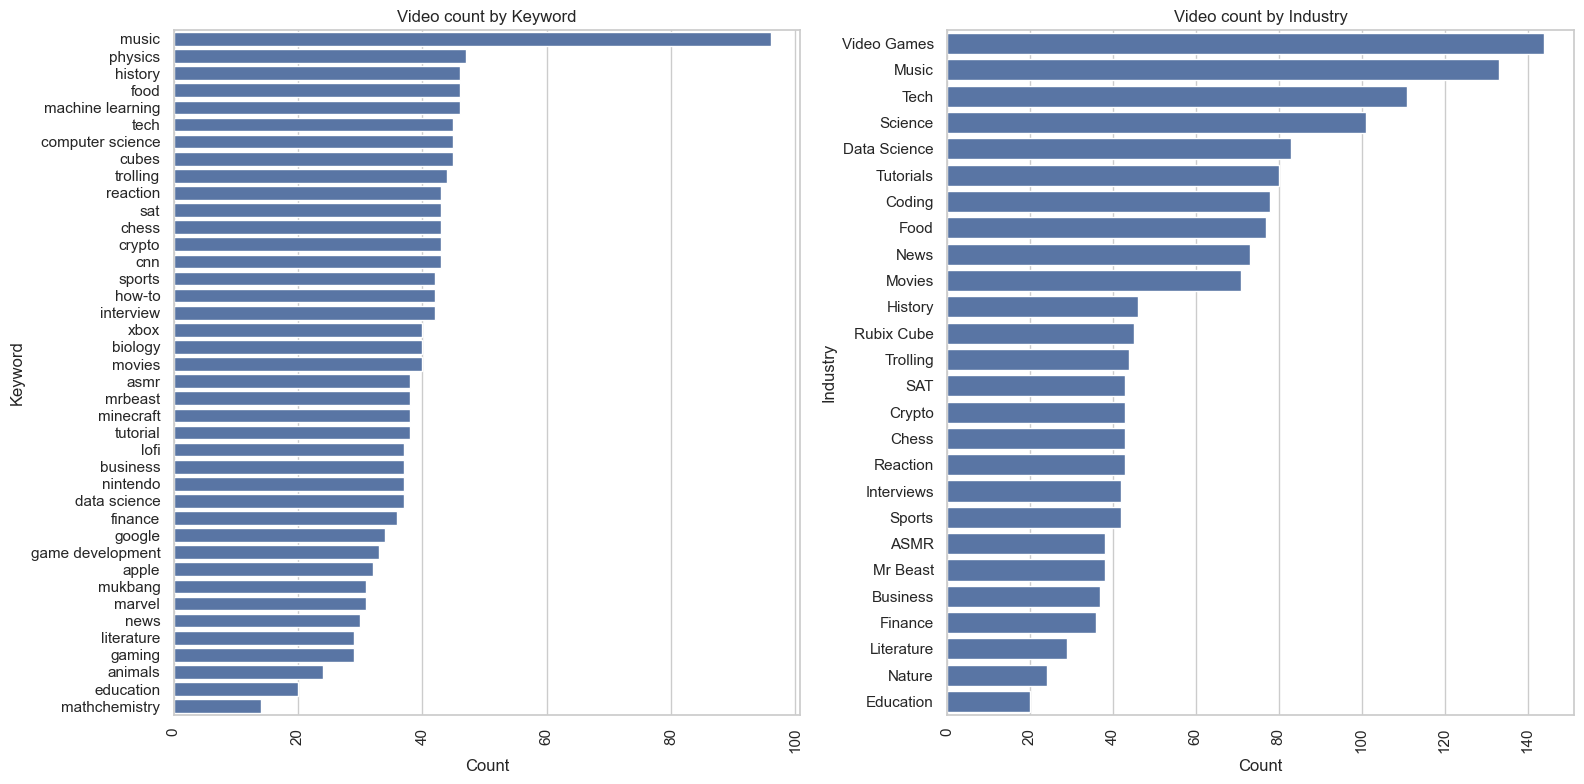

In [13]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
tmp = df.groupby('Keyword')['Video ID'].count().sort_values(ascending = False).reset_index()
tmp.columns = ['Keyword', 'Count']
sns.barplot(data = tmp, y = 'Keyword', x = 'Count')
plt.title("Video count by Keyword")
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
tmp = df.groupby('Industry')['Video ID'].count().sort_values(ascending = False).reset_index()
tmp.columns = ['Industry', 'Count']
sns.barplot(data = tmp, y = 'Industry', x = 'Count')
plt.title("Video count by Industry")
plt.xticks(rotation = 90)

plt.tight_layout()

### Comments

In [14]:
comments['Comment_Clean'] = comments['Comment'].apply(clean_text)
comments['Comment_len'] = comments['Comment'].apply(len)
comments['Comment_Tokens'] = comments['Comment_Clean'].apply(lambda x: x.split(' '))
comments

,Video ID,Comment,Likes,Sentiment,Comment_Clean,Comment_len,Comment_Tokens
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1,let forget apple pay 2014 required brand new i...,325,"[let, forget, apple, pay, 2014, required, bran..."
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0,nz 50 retailer ’ even contactless credit card ...,167,"[nz, 50, retailer, ’, even, contactless, credi..."
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2,forever acknowledge channel help lesson idea e...,187,"[forever, acknowledge, channel, help, lesson, ..."
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0,whenever go place ’ take apple pay ’ happen of...,459,"[whenever, go, place, ’, take, apple, pay, ’, ..."
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2,apple pay convenient secure easy use used kore...,140,"[apple, pay, convenient, secure, easy, use, us..."
...,...,...,...,...,...,...,...
18404,cyLWtMSry58,I really like the point about engineering tool...,0,2,really like point engineering toolbox think ’ ...,281,"[really, like, point, engineering, toolbox, th..."
18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20,2,’ started exploring field really good reminder...,121,"[’, started, exploring, field, really, good, r..."
18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1,1,excelente video con una pregunta filosófica pr...,251,"[excelente, video, con, una, pregunta, filosóf..."
18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35,2,hey daniel discovered channel couple day ago i...,92,"[hey, daniel, discovered, channel, couple, day..."


# 3.1) Exploratory Data Analysis: General

## Summary Stats

### Overall Engagement Rate

**Comment:** This is the model building objectives target variable and thus it is imperative to understand its distribution in the overall dataset. You can see from the box plot that the median engagement rate was 3.26 and that the data are sharply right-skewed, with a large number videos having an engagement rate value over 10.

In [15]:
median_engagement = df['Engagement Rate'].median()
df['Engagement Rate'].describe()

count   1,564.00
mean        3.96
std         3.15
min         0.01
25%         1.80
50%         3.26
75%         5.12
max        30.81
Name: Engagement Rate, dtype: float64

/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


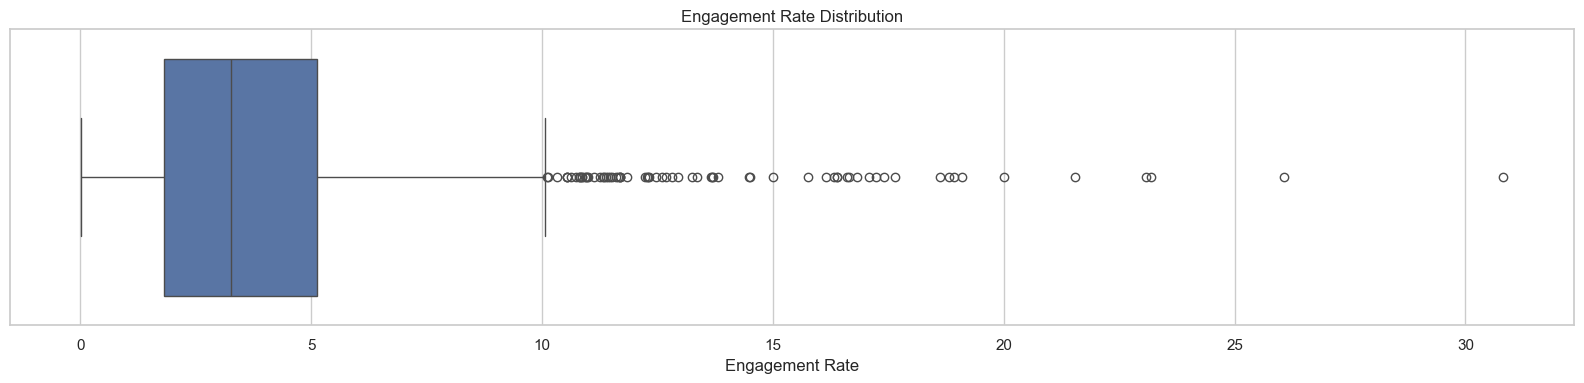

In [16]:
plt.figure(figsize = (16,4))
sns.boxplot(data = df, x = 'Engagement Rate')
plt.title("Engagement Rate Distribution")
plt.tight_layout()

### Engagement Rate by Keyword

**Comment:** I am interested how the engagement rate varied by the video category. The chart on the left plots median engagement rate for videos categorized using the original keyword values; the chart on the right uses my modified values (which I define as "Industry" rather than "Keyword"). As you can see, crypto, reaction, trolling, ASMR, and video games tend to have very high median engagement. On the opposite hand, sports, animals, and movies tended to draw less engagement. These overall findings are somewhat unsurprising given the content themes, target demographic, and subculture of these videos.

The median Data Science engagement rate was quite close to the dataset's overall median engagement rate.

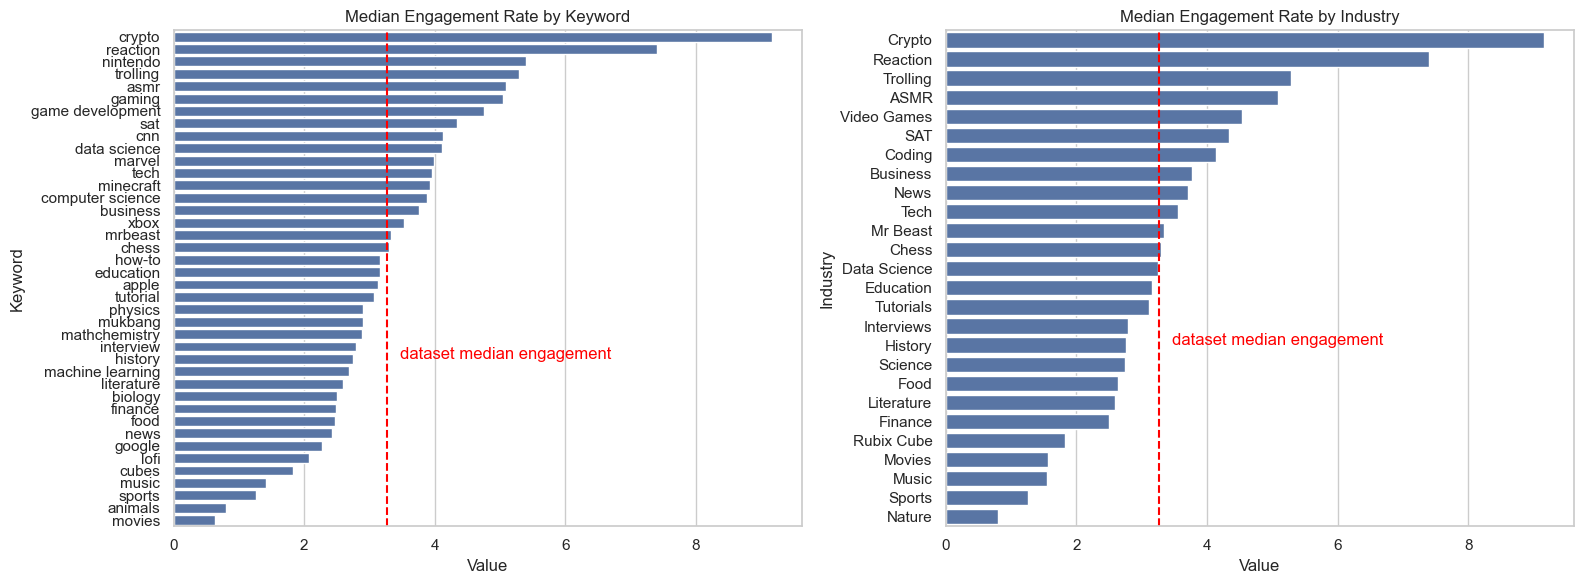

In [17]:
plt.figure(figsize = (16,6))
target = 'Engagement Rate'

plt.subplot(1, 2, 1)
column = 'Keyword'
plot_median_engagement_rate_by(df, column)
plt.axvline(median_engagement, c = 'red', linestyle = '--')
plt.text(median_engagement + .2, 26, "dataset median engagement", c = 'red')
plt.title(f"Median {target} by {column}")

plt.subplot(1, 2, 2)
column = 'Industry'
plot_median_engagement_rate_by(df, column)
plt.axvline(median_engagement, c = 'red', linestyle = '--')
plt.text(median_engagement + .2, 16, "dataset median engagement", c = 'red')
plt.title(f"Median {target} by {column}")
plt.tight_layout()

### Engagement Rate Distribution

**Comment:** In the charts below, I am interested in how the engagement rate is distributed across the respective video categories. I particularly wish to understand which keywords/industries have outlier engagement values. Data Science videos tend to be clustered more closely together in terms of engagement. By contrast, Music and Video Games videos tend to have more outlier engagement videos.

/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


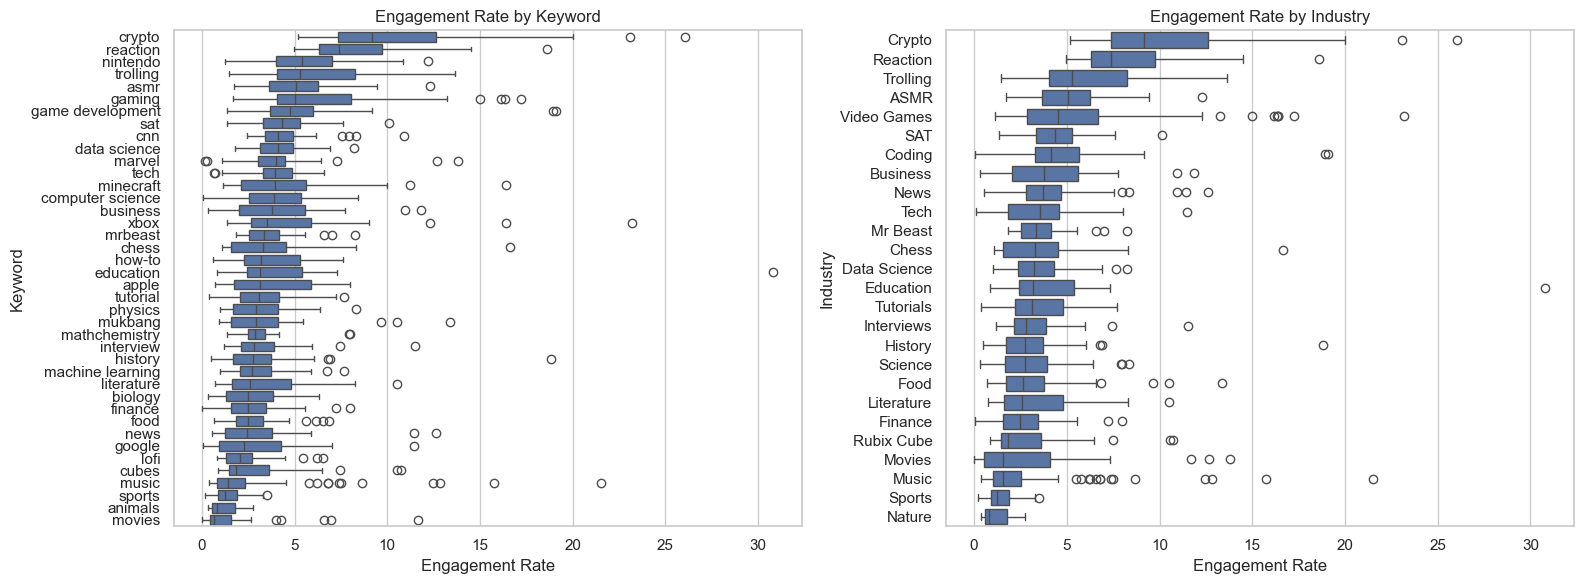

In [18]:
plt.figure(figsize = (16,6))

target = 'Engagement Rate'

plt.subplot(1, 2, 1)
column = 'Keyword'
sort_order = get_sort_index(df, column)
sns.boxplot(data = df, y = column, x = target, order = sort_order)
plt.title(f"{target} by {column}")

plt.subplot(1, 2, 2)
column = 'Industry'
sort_order = get_sort_index(df, column)
sns.boxplot(data = df, y = column, x = target, order = sort_order)
plt.title(f"{target} by {column}")
plt.tight_layout()

### Views

**Comment:** In the charts below, I am interested in how view count varies across the different keyword/industries. Just because a video has a low median engagement does not mean it is unpopular. If the view count is extremely high, that signals video popularity too. However, the dataset has some super-outliers that distort my understanding of each category's view distribution metric. Therefore I capped this specific analysis to include only videos whose view count was less than 10 million views.

- "Views by Keyword" chart shows that keywords like "apple," "minecraft," and "mrbeast" have high variability with notable outliers, suggesting that some videos under these keywords achieve viral success.
- In the "Views by Industry" chart, "Tutorials" and "Education" have notably high medians and a large number of views, indicating that videos in these industries are generally well-received and popular.
- Both charts indicate that while some categories consistently perform well, there are always a few outliers with significantly higher views. For instance, "tech" and "video games" in the industry chart, and "apple" and "mrbeast" in the keyword chart, show outliers that surpass typical view counts by a large margin.

/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


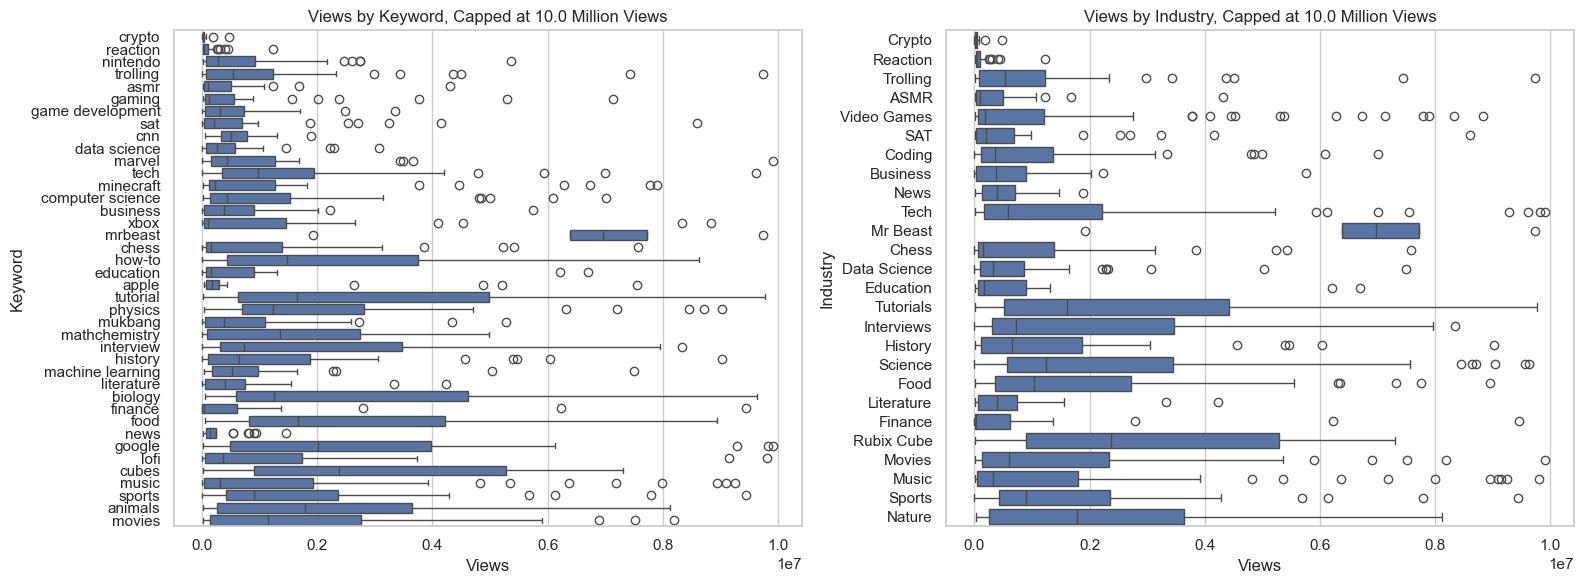

In [19]:
plt.figure(figsize = (16,6))

target = 'Views'
filter_threshold = 10000000

filter_df = df[df['Views'] <= filter_threshold]

plt.subplot(1, 2, 1)
column = 'Keyword'
sort_order = get_sort_index(df, column)
sns.boxplot(data = filter_df, y = column, x = target, order = sort_order)
plt.title(f"{target} by {column}, Capped at {filter_threshold / 1000000} Million Views")

plt.subplot(1, 2, 2)
column = 'Industry'
sort_order = get_sort_index(df, column)
sns.boxplot(data = filter_df, y = column, x = target, order = sort_order)
plt.title(f"{target} by {column}, Capped at {filter_threshold / 1000000} Million Views")
plt.tight_layout()

## Trends over Time

### Distribution of Videos by Year

**Comment:** In the chart below, you can see that this is a remarkably unbalanced dataset: 
- 92% of the video observations were published after 2018;
- 89% were published after 2019;
- 84% were published after 2020;
- 75% were published after 2021;
- 63% were published in 2022

Given this bias in the data, and how engagement may have changed on YouTube over time, it may make sense to later favor videos that are more recent.

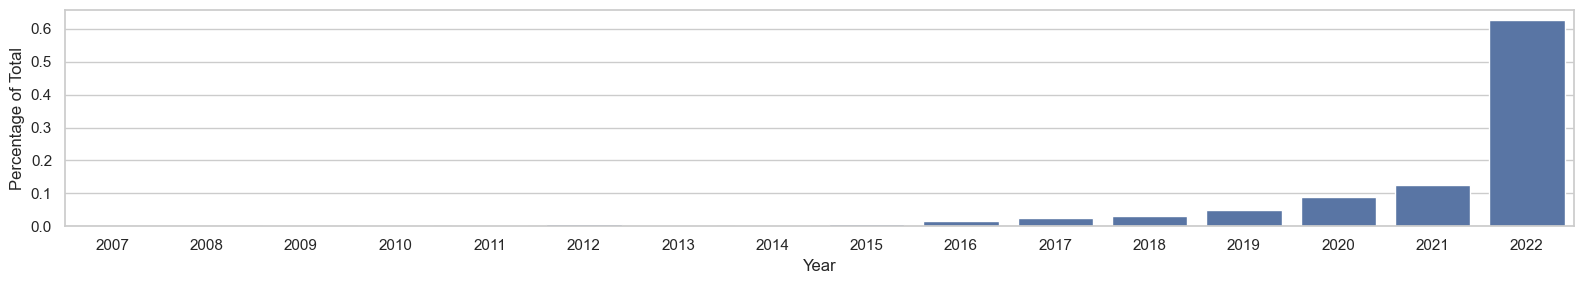

In [20]:
plt.figure(figsize = (16, 3))
tmp = df['Published Year'].value_counts().reset_index()
tmp.columns = ['Year', 'count']
tmp['pct_count'] = tmp['count'] / tmp['count'].sum()
tmp = tmp.sort_values(by = 'Year')
sns.barplot(data = tmp, x = 'Year', y = 'pct_count')
plt.ylabel("Percentage of Total")
plt.tight_layout()
# years = [2018, 2019, 2020, 2021, 2022]
# for year in years:
#     print(f"{round(tmp[tmp['Year'] >= year]['pct_count'].sum(), 2) * 100}% of videos published since {year}")

# 3.2) Exploratory Data Analysis: Video Stats Q&A

## Q1. Which industries have the highest average views, likes, and comments?

In [21]:
start_date = '2020-01-01'
end_date = '2022-12-31'

minimum_view_count = 10000

df_filtered = df[(df['Published At'] >= start_date) & (df['Published At'] <= end_date) & (df['Views'] >= minimum_view_count)]

### Highest views

**Comment:** As you see, the industries with the highest median views are Mr. Beast, Rubix Cube, and Nature. The remainder of the top-ten list is displayed below:

In [22]:
df_filtered.groupby('Industry')[['Views','Likes','Comments']].median().sort_values(by = 'Views', ascending = False).head(10)

,Views,Likes,Comments
Industry,,,
Mr Beast,"37,550,877.00","1,962,726.00","62,540.00"
Rubix Cube,"4,543,326.00","79,852.00","1,633.00"
Nature,"2,812,807.00","21,946.00",481.00
Sports,"1,417,201.50","17,929.50",742.00
Tutorials,"1,388,663.50","44,446.00","1,200.50"
Food,"1,342,174.50","35,984.50","1,506.50"
Movies,"1,284,173.00","15,641.00",523.00
Music,"933,111.00","11,197.00",314.00
Science,"880,432.00","29,581.00","1,350.00"


### Highest Likes

**Comment:** As you see, the industries with the highest median likes are Mr. Beast, Rubix Cube, and Tutorials. The remainder of the top-ten list is displayed below:

In [23]:
df_filtered.groupby('Industry')[['Views','Likes','Comments']].median().sort_values(by = 'Likes', ascending = False).head(10)

,Views,Likes,Comments
Industry,,,
Mr Beast,"37,550,877.00","1,962,726.00","62,540.00"
Rubix Cube,"4,543,326.00","79,852.00","1,633.00"
Tutorials,"1,388,663.50","44,446.00","1,200.50"
Food,"1,342,174.50","35,984.50","1,506.50"
Science,"880,432.00","29,581.00","1,350.00"
Trolling,"611,040.00","26,848.50","1,086.50"
Tech,"628,387.00","22,278.50","1,290.00"
Nature,"2,812,807.00","21,946.00",481.00
Sports,"1,417,201.50","17,929.50",742.00


### Highest Comments

**Comment:** As you see, the industries with the highest median comments are Mr. Beast, News, and Rubix Cube. The remainder of the top-ten list is displayed below:

In [24]:
df_filtered.groupby('Industry')[['Views','Likes','Comments']].median().sort_values(by = 'Comments', ascending = False).head(10)

,Views,Likes,Comments
Industry,,,
Mr Beast,"37,550,877.00","1,962,726.00","62,540.00"
News,"386,436.00","5,630.00","4,005.00"
Rubix Cube,"4,543,326.00","79,852.00","1,633.00"
Food,"1,342,174.50","35,984.50","1,506.50"
Science,"880,432.00","29,581.00","1,350.00"
Tech,"628,387.00","22,278.50","1,290.00"
Tutorials,"1,388,663.50","44,446.00","1,200.50"
History,"708,445.00","11,595.00","1,094.00"
Trolling,"611,040.00","26,848.50","1,086.50"


## Q2. Are there specific keywords that generate higher engagement?

**Comment:** This is ultimately a subjective evaluation regarding which terms to test. I selected the following terms and measured their average engagement rate values across the dataset:
'data science', 'machine learning', 'crypto', 'apple', 'mukbang', 'reaction', 'marvel', 'lyric', 'asmr', 'musk', 'music video', 'troll', 'data', 'tutorial', 'education', and 'fire.'

In [25]:
# Extract keywords/topics from 'Title_Clean'
keywords = [
    'data science', 
    'machine learning', 
    'crypto', 
    'apple', 
    'mukbang',
    'reaction',
    'marvel', 
    'lyric', 
    'asmr', 
    'musk',
    'music video',
    'troll',
    'data',
    'tutorial',
    'education',
    'fire'
]

tmp = df_filtered.copy()

tmp['Keywords'] = tmp['Title_Clean'].apply(lambda x: extract_keywords(x, keywords))

# Explode the keywords list to have one keyword per row for easier analysis
video_stats_exploded = tmp.explode('Keywords')

# Group by keywords and calculate average engagement
keyword_engagement = video_stats_exploded.groupby('Keywords').agg({
    'Engagement Rate': ['mean', 'std', 'count']
}).reset_index()
keyword_engagement.columns = ['Keyword', 'Avg_Engagement', 'Engagement_Stdev', 'Video_Count']

# Filter out keywords with low video counts for more reliable analysis
keyword_engagement = keyword_engagement[keyword_engagement['Video_Count'] > 10].sort_values(by = 'Avg_Engagement', ascending = False).reset_index(drop = True)

keyword_engagement

,Keyword,Avg_Engagement,Engagement_Stdev,Video_Count
0,reaction,7.13,2.92,40
1,crypto,6.12,4.90,24
2,troll,5.74,2.56,46
3,marvel,4.54,3.14,25
4,asmr,4.27,2.29,60
5,education,4.19,1.53,12
6,apple,4.06,2.58,26
7,data science,4.05,1.27,21
8,data,3.91,1.38,36
9,other,3.82,2.65,897


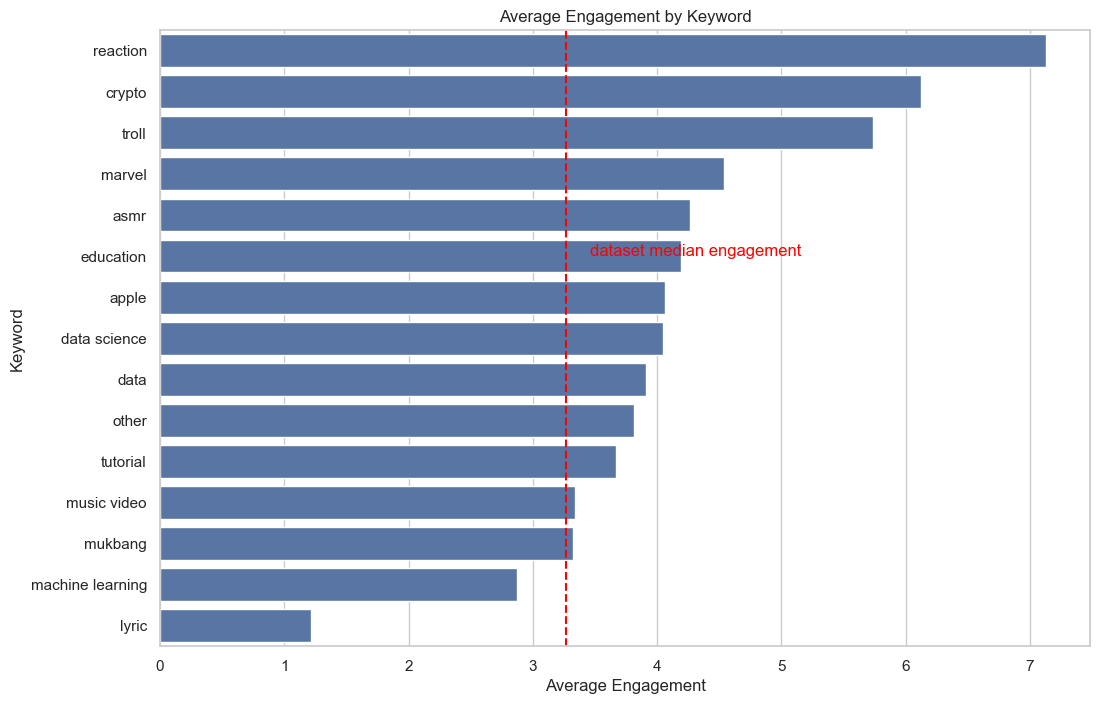

In [26]:
# Bar plot for average engagement by keyword
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Engagement', y='Keyword', data=keyword_engagement.sort_values('Avg_Engagement', ascending=False))
plt.xlabel('Average Engagement')
plt.ylabel('Keyword')
plt.axvline(median_engagement, c = 'red', linestyle = '--')
plt.text(median_engagement + .2, 5, "dataset median engagement", c = 'red')
plt.title('Average Engagement by Keyword')
plt.show()

## Q3. How do engagement metrics vary over time? Are there noticeable trends or patterns?

**Comment:** The below chart measures the median engagement rate for videos according to their publish data across time. Using time series decomposition, the chart isolates seasonal variations, highlights peaks and troughs, and idenfifies a general trend line. As you can see, the videos that are published more recently tend to have higher median engagement than those published in earlier years. There appears to be increased engagement in videos published after 2020. It's important to bear in mind that this sample is not representative and does not necessarily signify the true population trend.

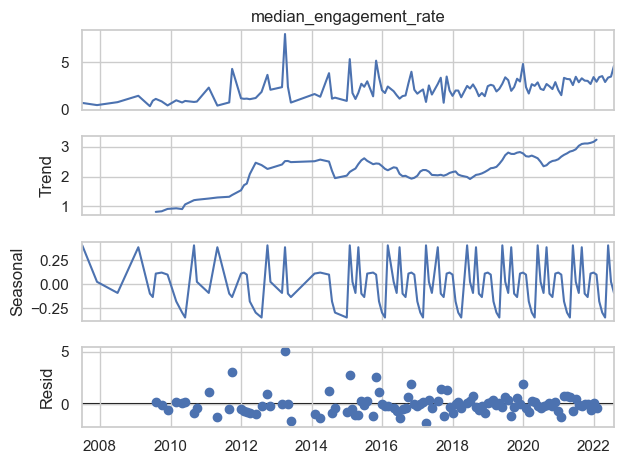

In [27]:
# Decompose the time series for 'avg_likes'

# Calculate average engagement metrics per cohort
cohort_engagement = df.groupby('Published Month').agg(
    avg_likes=('Likes', 'mean'),
    avg_comments=('Comments', 'mean'),
    avg_views=('Views', 'mean'),
    avg_likes_per_day=('Avg Likes', 'mean'),
    avg_comments_per_day=('Avg Comments', 'mean'),
    avg_views_per_day=('Avg Views', 'mean'),
    median_engagement_rate=('Engagement Rate', 'median')
).reset_index()

cohort_engagement.set_index('Published Month', inplace=True)
decomposition = sm.tsa.seasonal_decompose(cohort_engagement['median_engagement_rate'], model='additive', period=12)
decomposition.plot()

plt.show()

### Trends Since 2018

**Comment:** As 92% of the videos were published after 2018, I isolated the time series analysis to those videos published on or after January 1, 2018 through February 28, 2022. I selected the latter date to give videos in the dataset sufficient buffer to generate relative engagement.

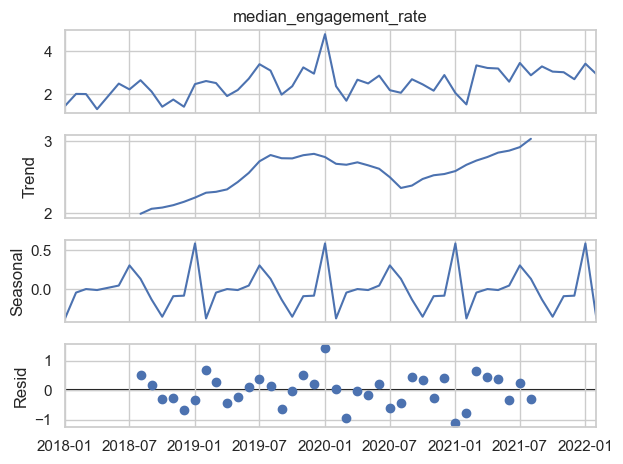

In [28]:
# Decompose the time series for 'avg_likes'

start_date = '2018-01-01'
end_date = '2022-02-28'

df_filtered = df[(df['Published At'] >= start_date) & (df['Published At'] <= end_date)]


# Calculate average engagement metrics per cohort
cohort_engagement = df_filtered.groupby('Published Month').agg(
    avg_likes=('Likes', 'mean'),
    avg_comments=('Comments', 'mean'),
    avg_views=('Views', 'mean'),
    avg_likes_per_day=('Avg Likes', 'mean'),
    avg_comments_per_day=('Avg Comments', 'mean'),
    avg_views_per_day=('Avg Views', 'mean'),
    median_engagement_rate=('Engagement Rate', 'median')
).reset_index()

cohort_engagement.set_index('Published Month', inplace=True)
decomposition = sm.tsa.seasonal_decompose(cohort_engagement['median_engagement_rate'], model='additive', period=12)
decomposition.plot()
plt.show()

## Q4. What are the characteristics of the top-performing videos in each industry?

**Comment** I took the top-5 videos in each category and extracted the tokens in their title text. The chart has been sorted by view count and reveals the topics of the highest performing videos per category keyword.

In [29]:
top_videos = df_filtered.groupby('Industry').apply(lambda x: x.nlargest(10, 'Engagement Rate')).reset_index(drop=True)

# Extract basic characteristics
top_videos['Title_Length'] = top_videos['Title_Clean'].apply(len)
top_videos['Word_Count'] = top_videos['Title_Clean'].apply(lambda x: len(x.split()))

# Sentiment analysis on comments
#comments['Sentiment'] = comments['Comment_Clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
#comment_sentiments = comments.groupby('Video ID')['Sentiment'].agg(['mean', 'std']).reset_index()
#comment_sentiments.columns = ['Video ID', 'Comment_Sentiment_mean', 'Comment_Sentiment_std']

# Merge comment sentiments with top_videos
#top_videos = top_videos.merge(comment_sentiments, left_on='Video ID', right_on='Video ID', how='left')

/var/folders/qq/_pxy1w012md00pykw2bn68bw0000gn/T/ipykernel_6773/1945786599.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_videos = df_filtered.groupby('Industry').apply(lambda x: x.nlargest(10, 'Engagement Rate')).reset_index(drop=True)


In [30]:
tmp = pd.merge(top_videos, comments, on = 'Video ID')
tmp['Comment_Sentiment_TB'] = tmp['Comment_Clean'].apply(get_sentiment)
comment_sent_tb = tmp.groupby('Industry')['Comment_Sentiment_TB'].mean().to_dict()

In [31]:
most_common = most_common_tokens_by_category(top_videos, 'Industry', 'Title_tokens', top_n = 5)

summary_stats = top_videos.groupby('Industry').median(numeric_only = True).reset_index()

#summary_stats.columns = list(map("_".join, summary_stats.columns.values))
summary_stats['Avg Comment Sentiment'] = summary_stats['Industry'].apply(lambda x: comment_sent_tb[x])
summary_stats['most_common_tokens'] = summary_stats['Industry'].apply(lambda x: [x[0] for x in most_common[x]])
summary_stats.sort_values(by = "Views", ascending = False)[['Industry','Engagement Rate','Likes','Comments','Views','Avg Comment Sentiment','Title_Length','most_common_tokens']]

,Industry,Engagement Rate,Likes,Comments,Views,Avg Comment Sentiment,Title_Length,most_common_tokens
12,Mr Beast,3.63,"3,738,633.50","151,827.50","103,851,539.50",0.29,29.00,"[game, people, opened, hour, world39s]"
18,Sports,1.22,"108,482.00","4,573.00","12,974,893.50",0.23,33.00,"[sport, moment, history, dude, perfect]"
0,ASMR,1.83,"148,120.00","6,622.00","10,008,290.00",0.21,88.00,"[asmr, want, sleep, soundly, 3hr]"
15,Rubix Cube,3.00,"271,813.50","1,848.00","8,716,969.00",0.22,36.00,"[cube, rubik39s, short, solve, magic]"
7,Food,2.27,"132,894.50","10,214.00","8,133,951.50",0.22,62.50,"[food, amp, state, mukbang, popular]"
14,Nature,0.80,"59,405.00","1,831.00","6,132,756.50",0.24,33.50,"[animal, world, wild, life, nature]"
19,Tech,3.98,"165,631.50","5,838.00","4,055,776.50",0.21,30.50,"[tech, google, thing, found, gift]"
20,Trolling,4.84,"130,599.00","10,244.00","3,675,733.00",0.13,32.00,"[trolling, zoom, class, feminist, part]"
21,Tutorials,4.18,"143,799.50","3,413.00","3,665,747.50",0.28,43.00,"[tutorial, python, start, blog, sophia]"
13,Music,2.21,"75,886.50","2,402.00","3,454,156.50",0.21,40.00,"[video, music, lofi, hip, official]"


# 3.3) Exploratory Data Analysis: Comment Sentiment Q&A

## What is the overall sentiment?

**Comment:** As mentioned, I ignored the provided sentiment score in the dataset and calculated my own using the TextBlob library. I considered any comment with a TextBlob sentiment value less than -0.2 to be 'negative'; any comment with a sentiment value greater than 0.2 to be 'positive'; and everything in between to be neural. The sentiment distribution became more granular as evidenced by the boxplot and histogram below.

In general, comments skews toward neural or positive. Half of comments had a positive sentiment, about 45% had a neutral sentiment, and the remaining 5% had a negative sentiment.

In [32]:
tmp = pd.merge(df, comments, on = 'Video ID', how = 'inner')
tmp['Comment_Sentiment_TB'] = tmp['Comment_Clean'].apply(get_sentiment)
tmp['Sentiment_Category'] = tmp['Comment_Sentiment_TB'].apply(get_sentiment_category)

In [33]:
tmp['Comment_Sentiment_TB'].describe()

count   23,155.00
mean         0.21
std          0.30
min         -1.00
25%          0.00
50%          0.18
75%          0.40
max          1.00
Name: Comment_Sentiment_TB, dtype: float64

/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


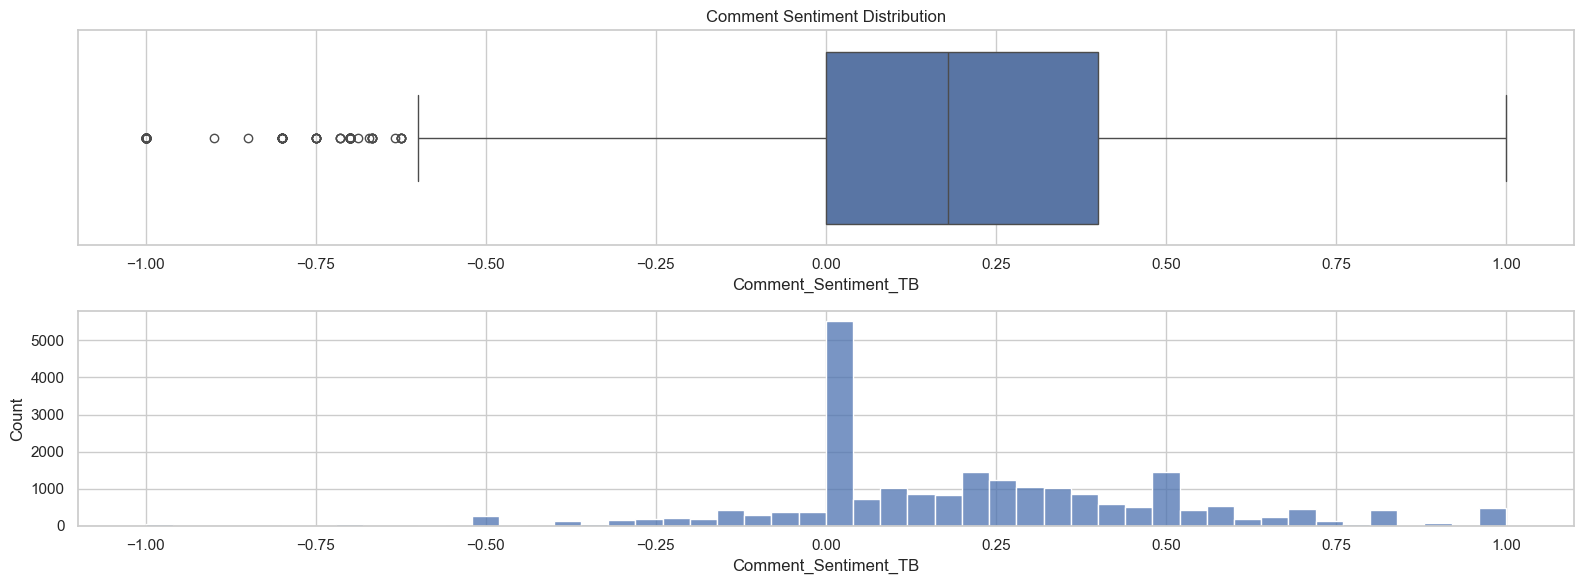

In [34]:
plt.figure(figsize = (16, 6))
plt.subplot(2, 1, 1)
sns.boxplot(data = tmp, x = 'Comment_Sentiment_TB')
plt.title("Comment Sentiment Distribution")

plt.subplot(2, 1, 2)
sns.histplot(data = tmp, x = 'Comment_Sentiment_TB', bins = 50)

plt.tight_layout()

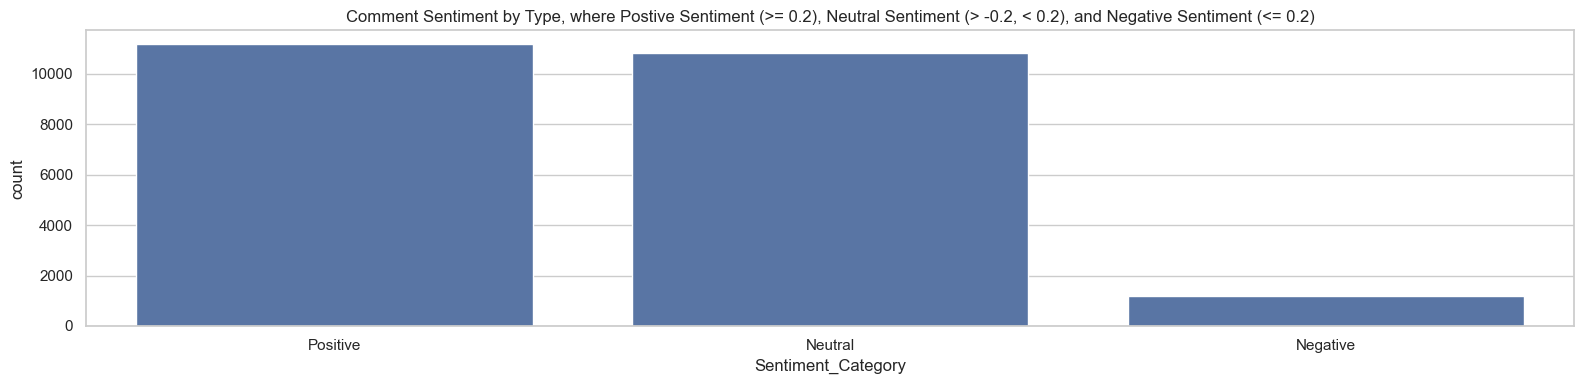

In [35]:
plt.figure(figsize = (16, 4))
sns.countplot(data = tmp, x = 'Sentiment_Category', order=['Positive', 'Neutral', 'Negative'])
plt.title("Comment Sentiment by Type, where Postive Sentiment (>= 0.2), Neutral Sentiment (> -0.2, < 0.2), and Negative Sentiment (<= 0.2)")

plt.tight_layout()

## How does comment sentiment vary by Industry?

**Comment** I wanted to understand how comments varied by Industry. 

### Mean sentiment scores
- The "Comment Mean Sentiment by Industry" chart shows that ASMR has the highest mean sentiment (0.30), followed closely by Mr Beast, Food, Data Science, Music, and Nature, all with mean sentiments around 0.27 to 0.30. This suggests that content in these industries generally elicits more positive reactions.
- Conversely, industries like News, History, and Trolling have lower mean sentiments (around 0.08 to 0.16), with News being particularly low at 0.08, indicating a higher proportion of negative or neutral comments.

### Sentiment distribution
- For many industries, the balance between positive, neutral, and negative comments varies. For example, in the Food industry, the positive comments significantly outnumber neutral and negative comments, whereas in the Tech industry, the distribution is more balanced among all three sentiment categories.
- The News industry shows a relatively higher count of negative comments compared to other industries, which aligns with its low mean sentiment score.

/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


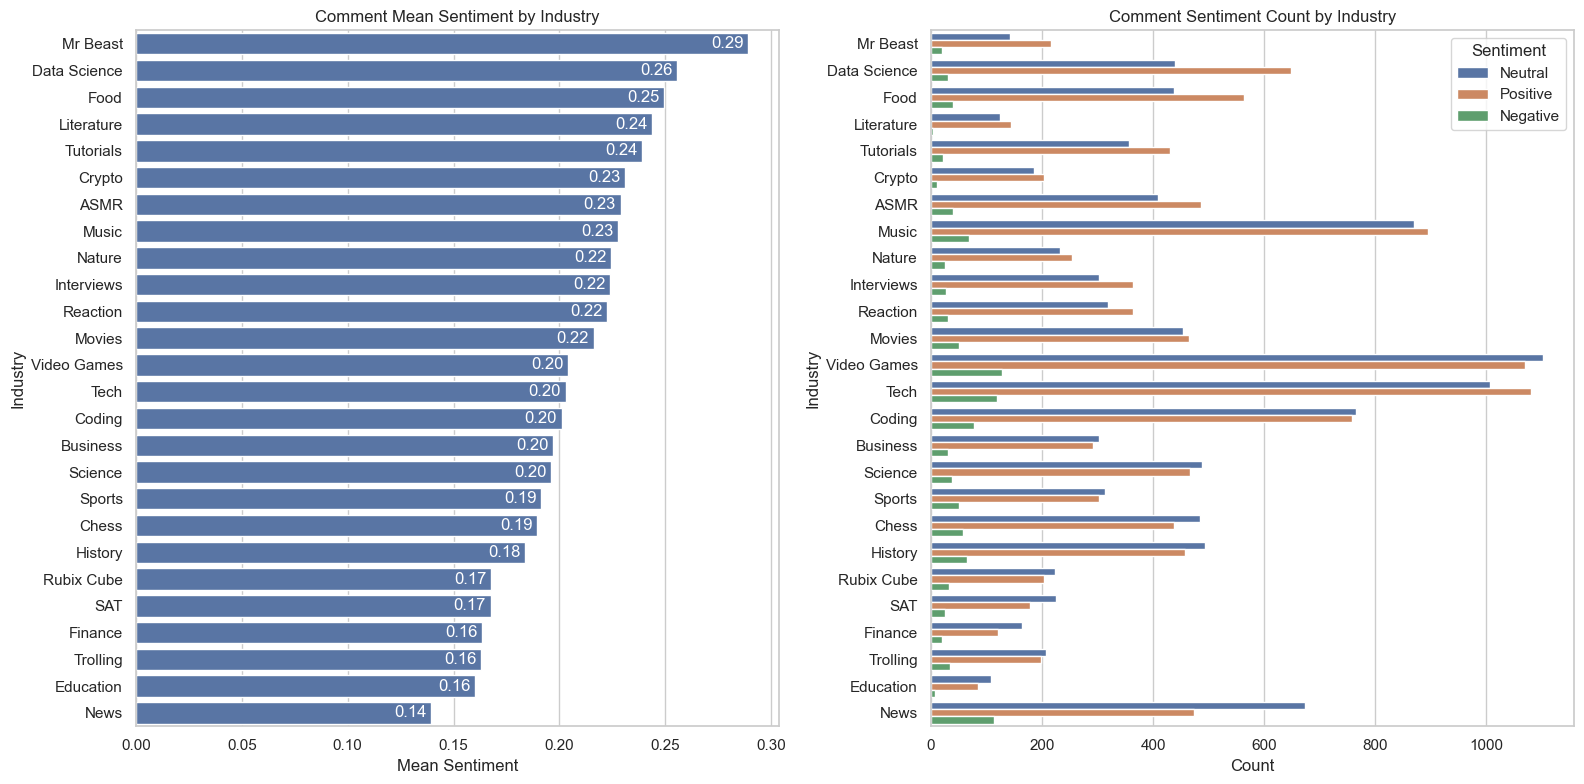

In [36]:
plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
tmp2 = tmp.groupby('Industry')['Comment_Sentiment_TB'].mean().sort_values(ascending = False).reset_index()
tmp2.columns = ['Industry','Mean Sentiment']
ax = sns.barplot(data = tmp2, y = 'Industry', x = 'Mean Sentiment')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}', 
                (width, p.get_y() + p.get_height() / 2),
                ha='center', va='center', 
                xytext=(-15, 0), 
                textcoords='offset points',
                color = 'white'
               )

plt.title("Comment Mean Sentiment by Industry")
sort_order = tmp2['Industry'].values

plt.subplot(1, 2, 2)
tmp3 = tmp.groupby(['Industry','Sentiment_Category'])['Title'].count().sort_values(ascending = False).reset_index()
tmp3.columns = ['Industry', 'Sentiment', 'Count']

sns.barplot(data = tmp3, y = 'Industry', x = 'Count', hue = 'Sentiment', order = sort_order)
plt.title("Comment Sentiment Count by Industry")
plt.tight_layout()

## Relationship between Comment Sentiment and Engagement Rate?

**Comment** I wanted to understand whether there was a relationship between the comment sentiment and overall engagement. For instance, was there any signal that dataset videos with high engagement tended to have more positively skewed comments and vice versa?

The left chart shows the overall relationship between engagement rate and mean comment sentiment, with a correlation coefficient of -0.04. This indicates a very weak negative correlation, suggesting that there is little to no linear relationship between engagement rate and mean comment sentiment across the dataset.

In both charts, most of the data points are clustered in the lower ranges of engagement rates (0-5) and mean comment sentiments (0.1-0.3). This clustering indicates that the majority of videos have lower engagement rates and moderate mean comment sentiments.

Lastly, because the objective of the exercise is to build a model focused on Data and AI skills, I wanted to know how videos categorized as Data Science fared.

The right chart highlights Data Science videos (in orange) within the overall dataset. These Data Science videos are dispersed throughout the scatter plot, indicating that their engagement rates and mean comment sentiments vary widely. However, they seem to follow the general pattern observed in the overall dataset.

/var/folders/qq/_pxy1w012md00pykw2bn68bw0000gn/T/ipykernel_6773/3255046762.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlation = round(tmp2.corr(numeric_only = True).iloc[0][1], 2)


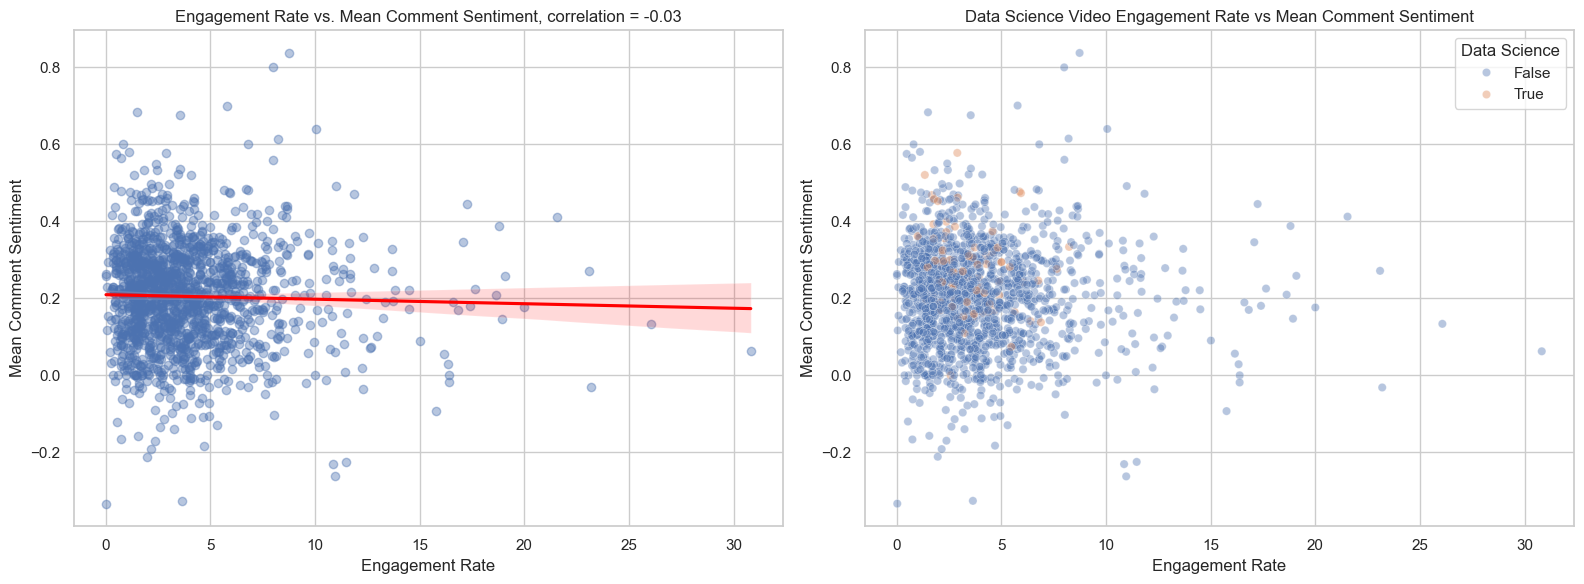

In [37]:
plt.figure(figsize = (16, 6))
tmp2 = tmp.groupby(['Video ID','Industry'])[['Engagement Rate', 'Comment_Sentiment_TB']].mean().reset_index()
plt.subplot(1, 2, 1)
sns.regplot(data = tmp2, x = 'Engagement Rate', y = 'Comment_Sentiment_TB', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.4})
correlation = round(tmp2.corr(numeric_only = True).iloc[0][1], 2)
plt.title(f"Engagement Rate vs. Mean Comment Sentiment, correlation = {correlation}")
plt.ylabel("Mean Comment Sentiment")



plt.subplot(1, 2, 2)
tmp2["Data Science"] = tmp2['Industry'].apply(lambda x: x == 'Data Science')
sns.scatterplot(data = tmp2, x = 'Engagement Rate', y = 'Comment_Sentiment_TB', hue = 'Data Science', alpha = 0.4)
plt.title("Data Science Video Engagement Rate vs Mean Comment Sentiment")
plt.ylabel("Mean Comment Sentiment")

plt.tight_layout()

# 4) Model Building

## Training Set

**Comment:** I performed all the necessary data merging and manipulation here on my cleaned dataset. The final features were: 'Industry', 'Title_Clean', 'Avg Views', 'Avg Comments', 'Avg Likes'; and used to predict the value 'Engagement Rate'.

In [38]:
tmp2 = tmp.groupby('Video ID')[['Comment_len','Comment_Sentiment_TB']].agg({'Comment_len':['mean','count'], 'Comment_Sentiment_TB':['mean']}).reset_index()
tmp2.columns = list(map("_".join, tmp2.columns.values))
tmp2.columns = ['Video ID', 'Comment_length', 'Comment_count', 'Comment_sentiment']

features = ['Video ID','Industry', 'Title_Clean', 'Avg Views', 'Avg Comments', 'Avg Likes', 'Engagement Rate']
tmp3 = pd.merge(df[features], tmp2, on = 'Video ID', how = 'inner')
tmp3.columns = [c.replace(" ","_") for c in tmp3.columns]
video_id = tmp3['Video_ID']
tmp3 = tmp3.drop('Video_ID', axis = 1)

## Pipeline

**Comment:** The model building pipeline standardizes all the numeric features, performs one-hot encoding of the categorical features, and employs the TF-IDF vectorizer on the text features of each observation title. The result of this data processing is then sent to the XGBoost regression estimator for model training.

In [39]:
target = 'Engagement_Rate'
variance_threshold = 0.8
tfidf_max_features = 50
token_pattern = r'(?u)\b[A-Za-z]{2,}\b'

X = tmp3.drop(target, axis = 1)
y = tmp3[target]

num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

num_preproc = make_pipeline(
    StandardScaler()
)

preproc_transformer = make_column_transformer(
    (num_preproc, num_features),
    (OneHotEncoder(drop = 'first', handle_unknown='ignore'), ['Industry']),
    (TfidfVectorizer(max_features=tfidf_max_features, token_pattern=token_pattern), 'Title_Clean'),
    remainder = 'drop'
)

preproc = make_pipeline(
    preproc_transformer,
    VarianceThreshold(0.6),
    XGBRegressor()
)

preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Avg_Views', 'Avg_Comments', 'Avg_Likes', 'Comment_length',
       'Comment_count', 'Comment_sentiment'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Industry']),
                                                 ('tfidfvectoriz...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

## Training & Evaluation

**Comment** This section could have been expanded to evaluate additional models. Overall, I found that XGBoost performed best for the task, achieving the lowest root mean squared error? Is it truly the "best" model with the lowest possible root mean squared error? No. However, it is certainly good enough for the objective of this assignment.

In [40]:
# Split into train and test set for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 42)

# Fit pipeline to training data
model_preproc = preproc.fit(X_train, y_train)

result = cross_validate(model_preproc, X_test, y_test, cv = 5, n_jobs=-1, scoring='neg_mean_squared_error')
rmse_cv = round(result['test_score'].mean(), 3)
print(f'Root Mean Squared Error: {-rmse_cv}')

Root Mean Squared Error: 1.652


## Retrain Model

**Comment:** Now with my fitted model, I yield predicted engagement scores for each of the videos in the dataset. In reality, I only need engagement estimates for videos categorized as "Data Science."

In [41]:
model = preproc.fit(X, y)

In [42]:
tmp4 = tmp3.copy()
tmp4['Predicted_Engagement'] = model.predict(X)
tmp4['Predicted_minus_Actual'] = tmp4['Predicted_Engagement'] - tmp4['Engagement_Rate']
tmp4['Video_ID'] = video_id

# 5) Strategic Recommendations

**Comment:** As mentioned previously, I selected the top-3 videos with the highest predicted engagement that were:

- Categorized as 'Data Science'
- Had an Engagement Rate greater than 4.00 (for reference, the median engagement rate was 3.26)
- Had an average comment sentiment greater than 0.2, signifying positive comments
- Was published on or after January 1, 2021 (I am biased against older videos in the dataset)

I believe these qualifications conform with the expectation of finding YouTube videos that would be effective for an E-Learning platform focused on Data and AI skills.

The overall results table is also displayed below, with quantitative values for each relevant video.

In [44]:
# Initial Filters
mask1 = (tmp4['Industry'] == 'Data Science')
mask2 = (tmp4['Engagement_Rate'] > 4.)
mask3 = (tmp4['Comment_sentiment'] > 0.2)

In [45]:
tmp5 = tmp4[mask1 & mask2 & mask3].sort_values(by = 'Predicted_minus_Actual', ascending = False).reset_index(drop = True)
tmp5 = tmp5[['Video_ID','Comment_length','Comment_count','Comment_sentiment','Predicted_Engagement','Predicted_minus_Actual']]

tmp5 = pd.merge(tmp5, df_filtered, left_on = 'Video_ID', right_on='Video ID', how = 'inner').drop([], axis = 1)

cols = ['Video_ID', 'Published At', 'Keyword', 'Title', 'Engagement Rate', 'Predicted_Engagement',
       'Likes', 'Comments', 'Views',
       'Avg Views', 'Avg Comments', 'Avg Likes', 'Comment_sentiment']

# Final Filter, videos published from 2021 onward
mask4 = tmp5['Published At'] >= '2021-01-01'

tmp5 = tmp5[cols]
tmp5 = tmp5[mask4]
tmp5 = tmp5.sort_values(by = "Predicted_Engagement", ascending = False).reset_index(drop = True)
tmp5

,Video_ID,Published At,Keyword,Title,Engagement Rate,Predicted_Engagement,Likes,Comments,Views,Avg Views,Avg Comments,Avg Likes,Comment_sentiment
0,A2v4_SFd9Cc,2022-02-20,data science,DATA SCIENTIST CAREER STORY (how I became a da...,6.05,6.03,"1,738.00",100.00,"32,054.00",172.33,0.54,9.34,0.24
1,4UJelID_ICw,2022-02-01,machine learning,Live Day 1- Introduction To Machine Learning A...,5.87,5.78,"1,861.00",184.00,"37,959.00",185.17,0.90,9.08,0.48
2,CC66RXeTn_4,2022-01-05,data science,How I Would Learn to be a Data Analyst,4.90,5.02,"20,106.00",616.00,"435,863.00","1,878.72",2.66,86.66,0.24
3,ylOILe-Sc-w,2021-08-06,data science,Data science roadmap: What skills you should l...,5.00,4.96,"14,986.00",616.00,"324,079.00",843.96,1.60,39.03,0.29
4,O9nf1CqjGzI,2022-02-25,data science,Data Science Career: (Is Becoming A Data Scien...,4.90,4.91,"12,111.00",467.00,"266,203.00","1,470.73",2.58,66.91,0.21
5,eJtHzkMy_1k,2021-04-26,data science,The math you actually need to know for data sc...,4.99,4.86,"26,837.00",555.00,"559,680.00","1,151.60",1.14,55.22,0.29
6,iPdO9MwdcLE,2022-02-14,data science,What Professional Data Scientists ACTUALLY Do,4.19,4.22,"2,020.00",133.00,"54,541.00",284.07,0.69,10.52,0.21
7,11unm2hmvOQ,2022-01-22,data science,Live Day 1- Introduction To statistics In Data...,4.26,4.20,"39,458.00",744.00,"961,789.00","4,473.44",3.46,183.53,0.31
8,#NAME?,2022-01-07,tech,My Everyday Tech: 2022!,3.57,4.06,"134,194.00","6,102.00","4,098,623.00","17,820.10",26.53,583.45,0.21
9,#NAME?,2021-08-03,interview,English Job Interview Dos &amp; Dont&#39;s! | ...,3.33,4.06,"19,630.00",515.00,"621,093.00","1,604.89",1.33,50.72,0.21


## Recommendation

**Comment:** The model recommends the following three videos, summarized below:

In [46]:
print("The model and objective requirements suggest the following three videos for a strategic collaboration")
print("---------------\n")

for i, row in tmp5.iterrows():
    print(f"{i + 1}")
    print(f"Video: {row['Title']}")
    print(f"Video ID: {row['Video_ID']}")
    print(f"Published: {row['Published At']}")
    print(f"Predicted Engagement: {round(row['Predicted_Engagement'], 2)}")
    print()
    if i == 2:
        break

The model and objective requirements suggest the following three videos for a strategic collaboration
---------------

1
Video: DATA SCIENTIST CAREER STORY (how I became a data scientist &amp; revealing my salaries)
Video ID: A2v4_SFd9Cc
Published: 2022-02-20 00:00:00
Predicted Engagement: 6.03

2
Video: Live Day 1- Introduction To Machine Learning Algorithms For Data Science
Video ID: 4UJelID_ICw
Published: 2022-02-01 00:00:00
Predicted Engagement: 5.78

3
Video: How I Would Learn to be a Data Analyst
Video ID: CC66RXeTn_4
Published: 2022-01-05 00:00:00
Predicted Engagement: 5.02



**Thanks for reading all the way to the end! Add a like if you found the content within helpful to your own data and AI skills advancement. Good luck!**